In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
from sklearn.preprocessing import StandardScaler

## Tarefas:

- Mapa: OK

- https://www.kaggle.com/code/camnugent/geospatial-feature-engineering-and-visualization/notebook

- https://geopandas.org/en/stable/gallery/plotting_basemap_background.html

- https://github.com/amitkac/CaliforniaHousing

- Tunar RNA: OK

    - Testar aumentar o lr pra rede maior

    - https://www.kaggle.com/code/bhavinmoriya/regression-using-neural-nets-and-rf-lr-etc

- SHAP

- Obter os MSE corretos OK

- Ajustar a regressão sem cada variável e obter o mse e comparar com os da RNA (média) OK

- Ajustar modelos de Regressão mais completo (stepwise, quadráticas, combinações):OK

    - https://datascience.stackexchange.com/questions/24405/how-to-do-stepwise-regression-using-sklearn/24447#24447

    - Realizar o monte carlo dos mse

- Criar grafico entre as previsões pela regressão e rna sobrepostos e o gabarito OK

- Criar tabela com pvalor e mse de cada variável nos 3 modelos OK
- paralelizar e gpu
- Treinar XGBoost: OK
    - https://www.kaggle.com/code/joseconomy/california-housing-prices-regression-with-xgboost

    - https://www.kaggle.com/code/megr25/california-houses-neural-network-xgboost

    - https://www.kaggle.com/code/jaggu2529/predict-house-price-xgboost-85-accuracy
    
- deixar gráfico quadrado OK
- treinar modelo stepwise no R
- Criar os mapas curva de nivel ou dispersão com as previsões variando apenas a longitude e latitude
- embaralhamento com 10000 reps para o p-valor
- adicionar 2 variáveis normais


### Leitura dos dados

In [2]:
df = pd.read_csv("housing.csv")


### Visualizar os dados

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Verificando o tamanho do dataset

In [4]:
df.shape

(20640, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.dropna(inplace = True)


### Distribuição variável ocean_proximity

In [6]:
df.ocean_proximity.value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

### Removendo a variável categórica "ocean_proximity"

In [7]:
df.drop(['ocean_proximity'], inplace=True, axis=1)

### Criando colunas distribuição normal

In [8]:
n = df.shape[0]
df["Norm1"] = np.random.normal(0, 1, size = n)
df["Norm2"] = np.random.normal(0, 1, size = n)

In [9]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Norm1,Norm2
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-0.027503,-1.144093
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0.816809,-0.593275
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0.657097,-1.233823
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0.350780,0.682785
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,-0.198466,-0.051591


### Estatísticas descritivas

In [10]:
df.describe().round(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Norm1,Norm2
count,20433.000,20433.000,20433.000,20433.000,20433.000,20433.000,20433.000,20433.000,20433.000,20433.000,20433.000
mean,-119.571,35.633,28.633,2636.504,537.871,1424.947,499.433,3.871,206864.413,0.004,0.010
std,2.004,2.136,12.592,2185.270,421.385,1133.208,382.299,1.899,115435.667,0.996,1.007
min,-124.350,32.540,1.000,2.000,1.000,3.000,1.000,0.500,14999.000,-4.092,-3.565
25%,-121.800,33.930,18.000,1450.000,296.000,787.000,280.000,2.564,119500.000,-0.670,-0.672
50%,-118.490,34.260,29.000,2127.000,435.000,1166.000,409.000,3.536,179700.000,0.009,0.011
75%,-118.010,37.720,37.000,3143.000,647.000,1722.000,604.000,4.744,264700.000,0.669,0.686
max,-114.310,41.950,52.000,39320.000,6445.000,35682.000,6082.000,15.000,500001.000,4.290,3.837


In [10]:
#df = df.query('median_house_value == 500001')

### Matrix de Correlação

In [15]:
df.corr().round(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,Norm1,Norm2
longitude,1.000,-0.925,-0.109,0.045,0.070,0.100,0.057,-0.016,-0.045,-0.014,0.000
latitude,-0.925,1.000,0.012,-0.037,-0.067,-0.109,-0.072,-0.080,-0.145,0.012,0.001
housing_median_age,-0.109,0.012,1.000,-0.361,-0.320,-0.296,-0.303,-0.118,0.106,0.004,-0.000
total_rooms,0.045,-0.037,-0.361,1.000,0.930,0.857,0.919,0.198,0.133,-0.007,-0.001
total_bedrooms,0.070,-0.067,-0.320,0.930,1.000,0.878,0.980,-0.008,0.050,-0.009,0.002
population,0.100,-0.109,-0.296,0.857,0.878,1.000,0.907,0.005,-0.025,-0.009,0.002
households,0.057,-0.072,-0.303,0.919,0.980,0.907,1.000,0.013,0.065,-0.007,0.003
median_income,-0.016,-0.080,-0.118,0.198,-0.008,0.005,0.013,1.000,0.688,0.005,0.001
median_house_value,-0.045,-0.145,0.106,0.133,0.050,-0.025,0.065,0.688,1.000,0.002,-0.010
Norm1,-0.014,0.012,0.004,-0.007,-0.009,-0.009,-0.007,0.005,0.002,1.000,0.003


### Box plot da variável dependente (y)

<AxesSubplot:title={'center':'Preço dos Imóveis'}, xlabel='Reais'>

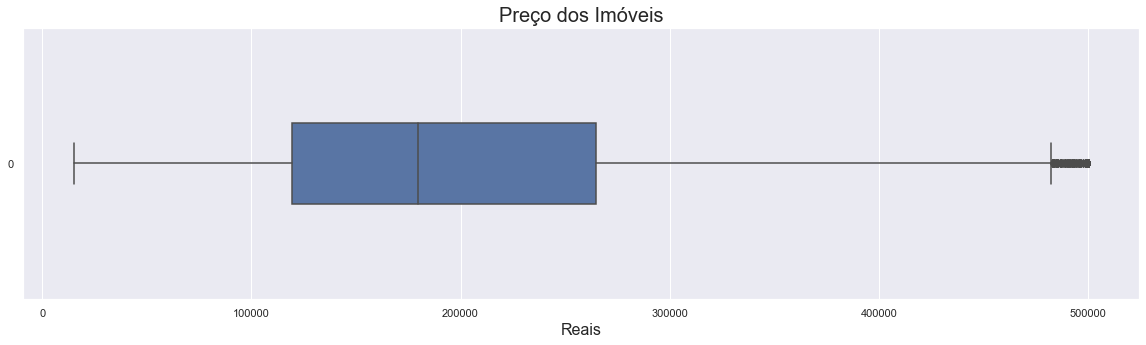

In [12]:
ax = sns.boxplot(data=df['median_house_value'], orient='h', width=0.3)
ax.figure.set_size_inches(20, 5)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

### Distribuição de frequências da variável *dependente* (y)

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='Preço dos Imóveis (R$)', ylabel='Density'>

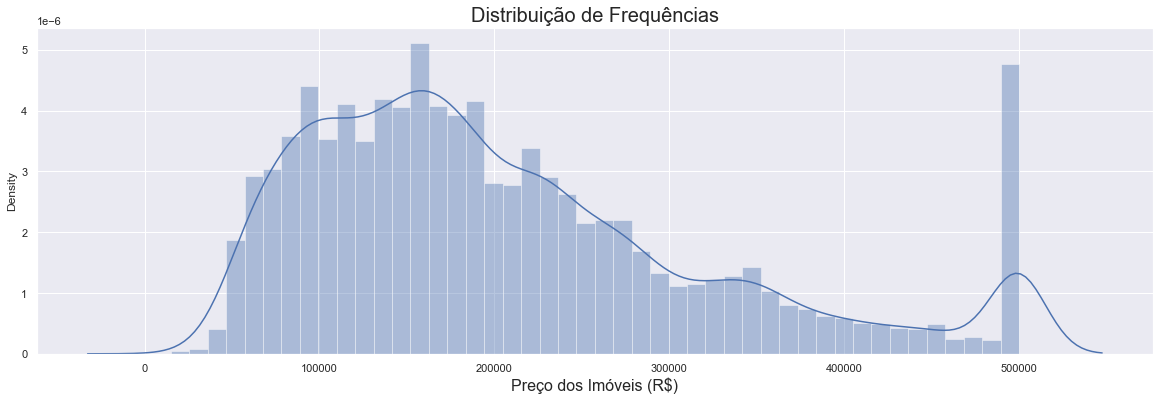

In [13]:
ax = sns.distplot(df['median_house_value'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

In [14]:
#ax = sns.pairplot(df)

### Visualização de mapa

In [15]:
#conda install --channel conda-forge geopandas

In [16]:
#import geopandas
#import contextily as cx

In [15]:
california_img=mpimg.imread('map1.jpg')

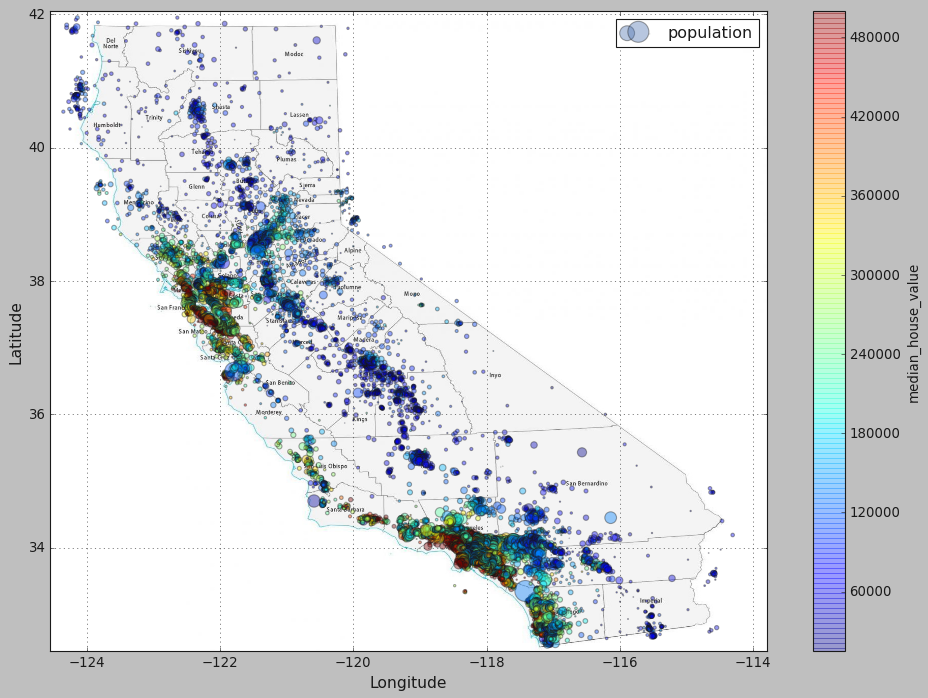

In [19]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                s=df['population']/100, label='population', figsize=(15,10),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
plt.style.use('classic')
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

plt.grid(b=None)

plt.show()

### Gráficos de dispersão entre as variáveis do dataset

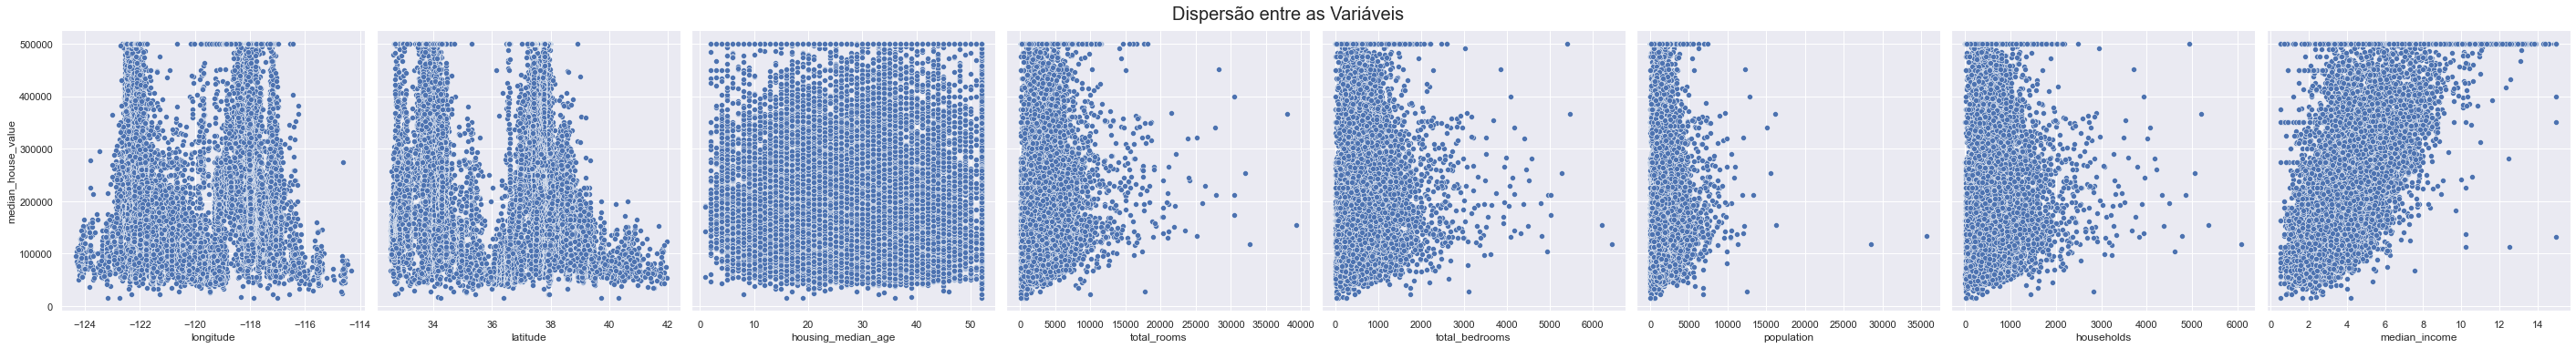

In [19]:
ax = sns.pairplot(df, y_vars='median_house_value', x_vars=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [20]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

### Transformação log para a variável (y)

In [19]:
df['median_house_value'] = np.log(df['median_house_value'])


C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências'}, xlabel='log do Preço dos Imóveis (R$)', ylabel='Density'>

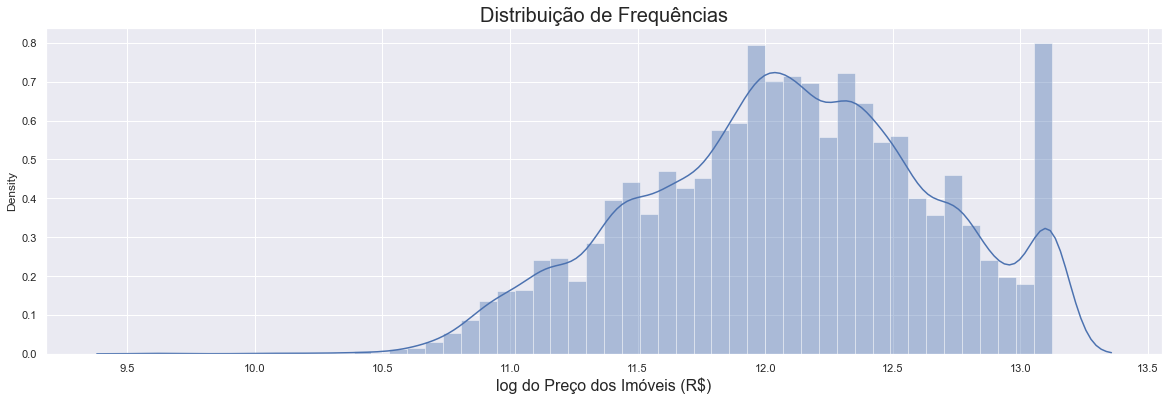

In [20]:
ax = sns.distplot(df['median_house_value'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis (R$)', fontsize=16)
ax

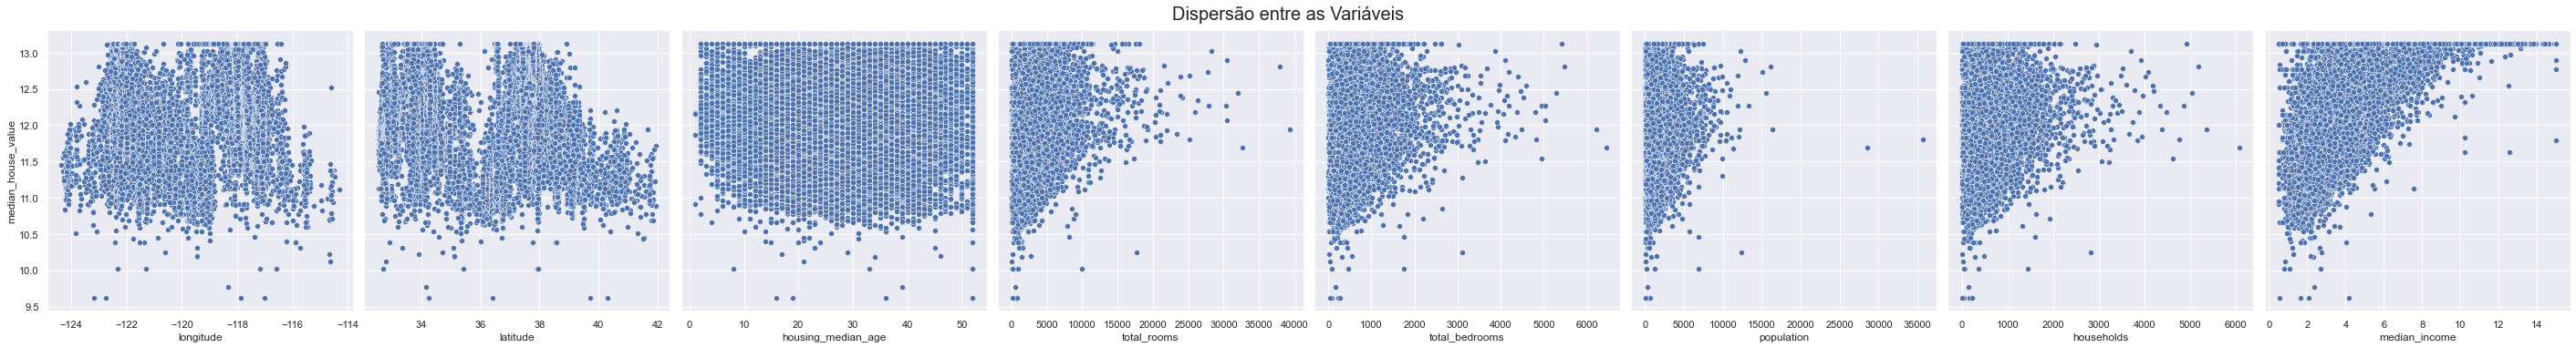

In [21]:
ax = sns.pairplot(df, y_vars='median_house_value', x_vars=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [24]:
#df = pd.get_dummies(df, columns = ['ocean_proximity'])

### Criando os datasets de Treino e Teste

In [22]:
y = df['median_house_value']
x = df.drop(['median_house_value'],axis = 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)


In [24]:
X_train.shape

(16346, 10)

In [25]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Norm1,Norm2
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,0.927140,0.774665
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,0.314166,-0.000445
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,-0.441594,-0.201013
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,-0.202624,0.283277
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,-0.756635,2.452697
...,...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,0.080805,-1.055596
12081,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,0.457966,-1.730175
5447,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,-0.090266,-1.181286
866,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0.691284,-0.471544


In [29]:
y_train.shape

(16346,)

## Regressão Linear

### Estimando o modelo com statsmodels

In [26]:
X_train_com_constante = sm.add_constant(X_train) #adicionando a constante para trabalhar de forma matricial

In [27]:
X_train_com_constante

,const,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,Norm1,Norm2
17727,1.0,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,0.927140,0.774665
2057,1.0,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,0.314166,-0.000445
6453,1.0,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,-0.441594,-0.201013
4619,1.0,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,-0.202624,0.283277
15266,1.0,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,-0.756635,2.452697
...,...,...,...,...,...,...,...,...,...,...,...
11397,1.0,-117.97,33.72,24.0,2991.0,500.0,1437.0,453.0,5.4286,0.080805,-1.055596
12081,1.0,-117.54,33.76,5.0,5846.0,1035.0,3258.0,1001.0,4.7965,0.457966,-1.730175
5447,1.0,-118.42,34.01,42.0,1594.0,369.0,952.0,362.0,3.0990,-0.090266,-1.181286
866,1.0,-122.04,37.57,12.0,5719.0,1064.0,3436.0,1057.0,5.2879,0.691284,-0.471544


In [28]:
modelo_statsmodel = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()


### Avaliando as Estatísticas de teste do modelo

In [29]:
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2919.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:27:20   Log-Likelihood:                -5545.6
No. Observations:               16346   AIC:                         1.111e+04
Df Residuals:                   16335   BIC:                         1.120e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.6972      0

## Estimando o modelo com dados de treino

### Normalizando os dados

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Treinando o modelo com sklearn

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [32]:
modelo = LinearRegression()

In [33]:
modelo.fit(X_train, y_train)

LinearRegression()

#### Regressao simples retirando uma variável por vez

def Regressao(col):
    df_temp = df.copy()
    y = df_temp['median_house_value']
    x = df_temp.drop(['median_house_value',col],axis =1)
    
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=42)
    
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    y_previsto = modelo.predict(X_test)
    y_previsto_truncado = np.where(y_previsto > np.log(500001), np.log(500001), y_previsto)
    
    return  mean_squared_error(y_test, y_previsto_truncado).round(3)
    
    
    

In [34]:
colunas = df.columns.drop('median_house_value')

### Obtendo o R² para os dados de treino

In [35]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.641


### Fazendo previsões para os dados de treino

In [36]:
y_previsto_train = modelo.predict(X_train)

In [37]:
y_previsto_train_truncado = np.where(y_previsto_train > np.log(500001), np.log(500001), y_previsto_train)


### MSE para os dados de treino

In [38]:
print("MSE = ",mean_squared_error(y_train, y_previsto_train).round(3))

MSE =  0.115


In [39]:
print("MSE truncado = ",mean_squared_error(y_train, y_previsto_train_truncado).round(3))

MSE truncado =  0.11


### Fazendo previsões para os dados de teste

In [40]:
y_previsto = modelo.predict(X_test)
y_previsto_truncado = np.where(y_previsto > np.log(500001), np.log(500001), y_previsto)

### Obtendo o R² para os dados de teste

In [41]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.648


In [42]:
print('R² truncado = %s' % metrics.r2_score(y_test, y_previsto_truncado).round(3))

R² truncado = 0.662


### MSE para os dados de Teste

In [43]:



print("MSE = ",mean_squared_error(y_test, y_previsto).round(3))

MSE =  0.117


In [44]:
mse_REG = mean_squared_error(y_test, y_previsto_truncado).round(3)
print("MSE truncado= ",mse_REG)

MSE truncado=  0.113


### Gráfico de dispersão Previsões x Real

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Log Preço - Previsão', ylabel='Log Preço - Real'>

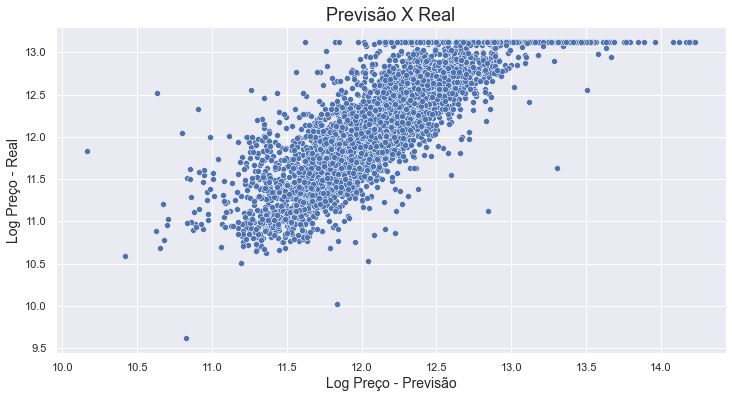

In [50]:
ax = sns.scatterplot(x=y_previsto, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Log Preço - Previsão', fontsize=14)
ax.set_ylabel('Log Preço - Real', fontsize=14)
ax

### Gráfico de dispersão Previsões Truncadas x Real

<AxesSubplot:title={'center':'Previsão Truncada X Real'}, xlabel='Log Preço - Previsão', ylabel='Log Preço - Real'>

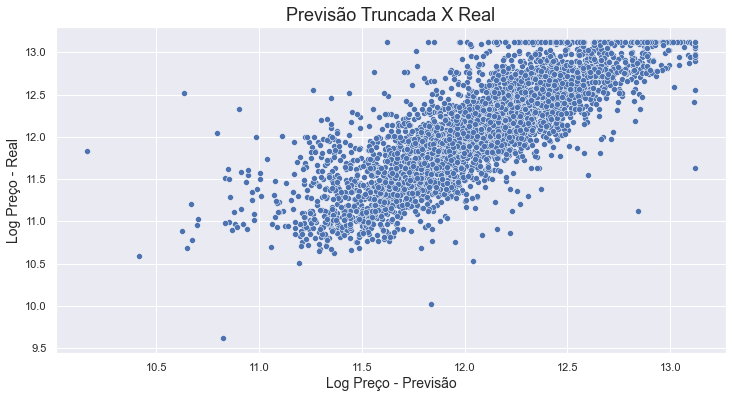

In [51]:
ax = sns.scatterplot(x=y_previsto_truncado, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão Truncada X Real', fontsize=18)
ax.set_xlabel('Log Preço - Previsão', fontsize=14)
ax.set_ylabel('Log Preço - Real', fontsize=14)
ax

### Obtendo o resíduo

In [45]:
residuo = y_train - y_previsto_train

In [46]:
residuo_truncado = y_train - y_previsto_train_truncado

### Histograma do resíduo

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Preço', ylabel='Density'>

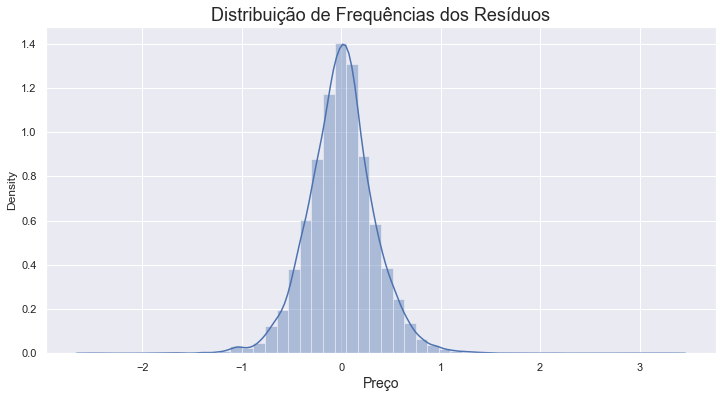

In [47]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Preço', fontsize=14)
ax

C:\Users\lucas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos Truncados'}, xlabel='Preço', ylabel='Density'>

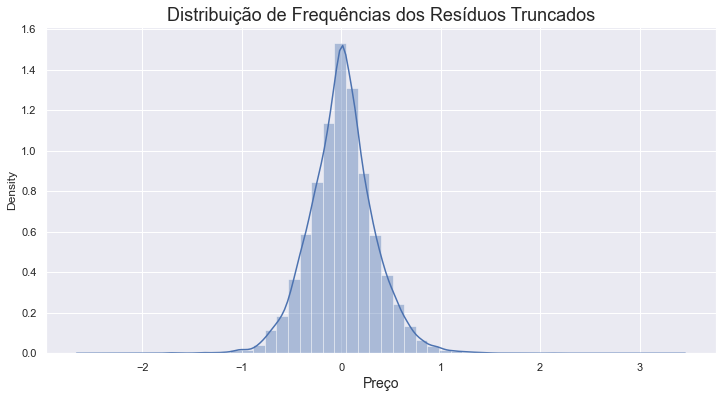

In [55]:
ax = sns.distplot(residuo_truncado)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos Truncados', fontsize=18)
ax.set_xlabel('Preço', fontsize=14)
ax

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Log Preço - Previsão', ylabel='Resíduos'>

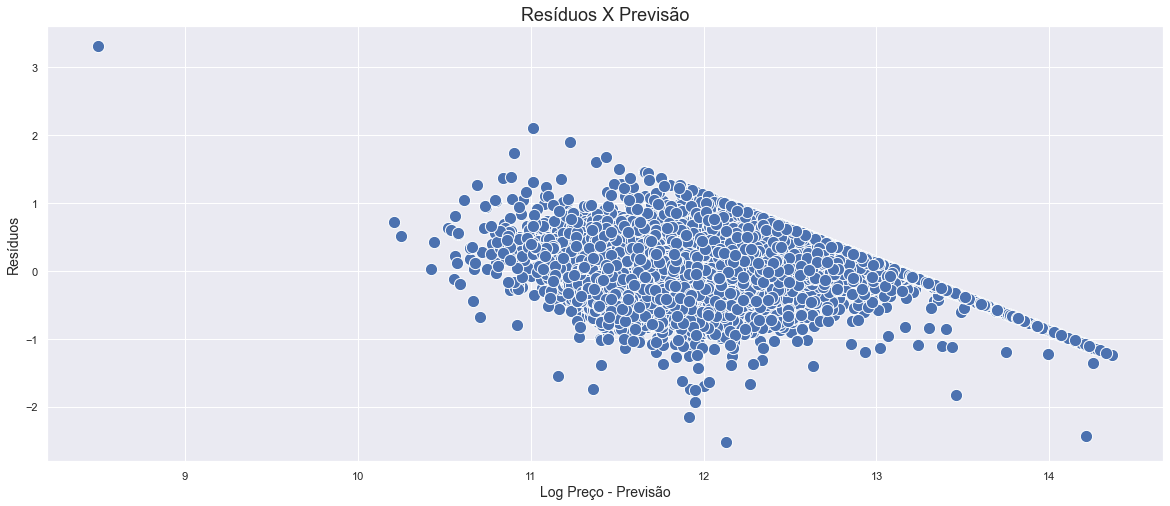

In [48]:
ax = sns.scatterplot(x=y_previsto_train, y=residuo, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Log Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### Regressão Stepwise

In [57]:
df_sw = df.copy()

In [58]:
df_sw.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022764
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789684
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771671
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740517
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743151


In [59]:
# Termos ao quadrado
df_sw['longitude2'] = df_sw['longitude']**2
df_sw['latitude2'] = df_sw['latitude']**2
df_sw['housing_median_age2'] = df_sw['housing_median_age']**2
df_sw['total_rooms2'] = df_sw['total_rooms']**2
df_sw['total_bedrooms2'] = df_sw['total_bedrooms']**2
df_sw['population2'] = df_sw['population']**2
df_sw['households2'] = df_sw['households']**2
df_sw['median_income2'] = df_sw['median_income']**2


# Combinação de variável
df_sw['longitude_latitude'] = df_sw['longitude']*df_sw['latitude']
df_sw['housing_median_age_total_rooms'] = df_sw['housing_median_age']*df_sw['total_rooms']
df_sw['total_bedrooms_population'] = df_sw['total_bedrooms']*df_sw['population']
df_sw['households_median_income'] = df_sw['households']*df_sw['median_income']
df_sw['longitude_median_income'] = df_sw['longitude']*df_sw['median_income']
df_sw['latitude_households'] = df_sw['latitude']*df_sw['households']
df_sw['housing_median_age_population'] = df_sw['housing_median_age']*df_sw['population']
df_sw['longitude_total_bedrooms'] = df_sw['longitude']*df_sw['total_bedrooms']
df_sw['median_income_total_bedrooms'] = df_sw['median_income']*df_sw['total_bedrooms']



x_columns = list(df_sw.drop(['median_house_value'],axis = 1).columns)


stepAIC


In [60]:
def get_stats(data):
    x = data[x_columns]
    y = data[['median_house_value']]
    results = sm.OLS(y, x).fit()
    print(results.summary())


In [61]:
get_stats(df_sw)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     1955.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:31   Log-Likelihood:                -5282.9
No. Observations:               20433   AIC:                         1.062e+04
Df Residuals:                   20408   BIC:                         1.081e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
longitude   

In [62]:
x_columns.remove("median_income")
get_stats(df_sw)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2040.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:31   Log-Likelihood:                -5283.0
No. Observations:               20433   AIC:                         1.061e+04
Df Residuals:                   20409   BIC:                         1.080e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
longitude   

In [63]:
x_columns.remove("total_bedrooms_population")
get_stats(df_sw)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2133.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:31   Log-Likelihood:                -5283.1
No. Observations:               20433   AIC:                         1.061e+04
Df Residuals:                   20410   BIC:                         1.079e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
longitude   

In [64]:
x_columns.remove("households_median_income")
get_stats(df_sw)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2235.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:31   Log-Likelihood:                -5283.2
No. Observations:               20433   AIC:                         1.061e+04
Df Residuals:                   20411   BIC:                         1.078e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
longitude   

In [65]:
x_columns.remove("housing_median_age_population")
get_stats(df_sw)

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2347.
Date:                Mon, 15 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:49:31   Log-Likelihood:                -5283.6
No. Observations:               20433   AIC:                         1.061e+04
Df Residuals:                   20412   BIC:                         1.078e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
longitude   

In [66]:
# Separando X e y

y_sw = df_sw['median_house_value']
x_sw = df_sw[x_columns]

X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(x_sw, y_sw, test_size = 0.20, random_state=42)

In [67]:
modelo_sw = LinearRegression()

In [68]:
modelo_sw.fit(X_train_sw,y_train_sw)

LinearRegression()

In [69]:
print('R² = {}'.format(modelo_sw.score(X_test_sw, y_test_sw).round(3)))

R² = 0.701


In [70]:
y_previsto_sw = modelo_sw.predict(X_test_sw)


In [71]:
y_previsto_sw_truncado = np.where(y_previsto_sw > np.log(500001), np.log(500001), y_previsto_sw)



In [72]:
print("MSE = ",mean_squared_error(y_test_sw, y_previsto_sw).round(3))


MSE =  0.1


In [73]:
print("MSE truncado = ",mean_squared_error(y_test_sw, y_previsto_sw_truncado).round(3))

MSE truncado =  0.099


<AxesSubplot:title={'center':'Previsão Truncada X Real'}, xlabel='Log Preço - Previsão', ylabel='Log Preço - Real'>

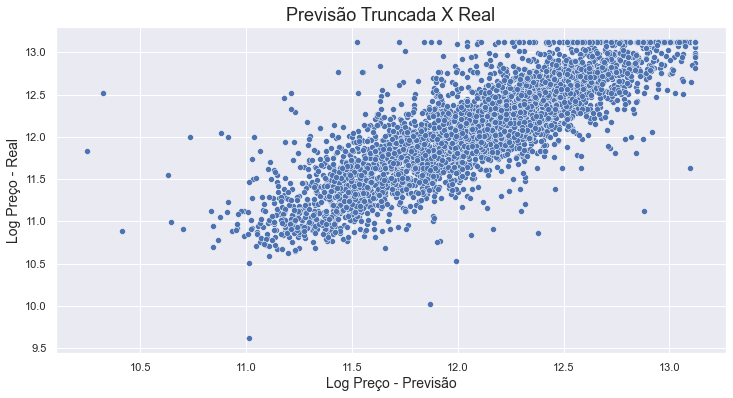

In [74]:
ax = sns.scatterplot(x=y_previsto_sw_truncado, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão Truncada X Real', fontsize=18)
ax.set_xlabel('Log Preço - Previsão', fontsize=14)
ax.set_ylabel('Log Preço - Real', fontsize=14)
ax

## Redes Neurais

In [49]:
import tensorflow as tf
import keras
from keras import backend as K

### Criando a função de R2

In [50]:
#R2 função

def R2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

### Definindo a arquitetura da rede, os otimizadores e as funções de perda

In [51]:
n_hidden = 30 
n_outputs = 1 


model_RNA1 = keras.models.Sequential([   
    keras.layers.Dense( n_hidden, activation="relu", input_shape=X_train.shape[1:] ),
    keras.layers.Dense(n_outputs) 
])

model_RNA1.compile( loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3))#,
                   #metrics=[R2] )


In [52]:
n_hidden = 180 
n_outputs = 1 


model_RNA2 = keras.models.Sequential([   
    keras.layers.Dense( n_hidden, activation="relu", input_shape=X_train.shape[1:] ),
    keras.layers.Dense( n_hidden, activation="relu" ),
    keras.layers.Dense( n_hidden, activation="relu"),
    keras.layers.Dense(n_outputs) 
])

model_RNA2.compile( loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3))#,
                   #metrics=[R2] )

In [53]:
n_hidden = 180 
n_outputs = 1 


model_RNA3 = keras.models.Sequential([   
    keras.layers.Dense( n_hidden, activation="relu", input_shape=X_train.shape[1:] ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu" ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu"),
    keras.layers.Dense(n_outputs) 
])

model_RNA3.compile( loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3))#,
                   #metrics=[R2] )

In [54]:
n_hidden = 360 
n_outputs = 1 


model_RNA4 = keras.models.Sequential([   
    keras.layers.Dense( n_hidden, activation="relu", input_shape=X_train.shape[1:] ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu" ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(n_outputs) 
])

model_RNA4.compile( loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3))#,
                   #metrics=[R2] )

In [55]:
n_hidden = 360 
n_outputs = 1 


model_RNA5 = keras.models.Sequential([   
    keras.layers.Dense( n_hidden, activation="relu", input_shape=X_train.shape[1:] ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu" ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(n_outputs) 
])

model_RNA5.compile( loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-2))#,
                   #metrics=[R2] )

In [56]:
n_hidden = 360 
n_outputs = 1 


model_RNA6 = keras.models.Sequential([   
    keras.layers.Dense( 512, activation="relu", input_shape=X_train.shape[1:] ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( 256, activation="relu" ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( 128, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( 64, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( 32, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(n_outputs) 
])

model_RNA6.compile( loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-2))#,
                   #metrics=[R2] )




### Resumo do modelo

In [83]:
#model_RNA.summary()

### Treinando o modelo

history1 = model_RNA1.fit( X_train, y_train, 
                    epochs=30,
                    verbose = 1,
                    validation_split = 0.2
                    )

history2 = model_RNA2.fit( X_train, y_train, 
                    epochs=30,
                    verbose = 1,
                    validation_split = 0.2
                    )

history3 = model_RNA3.fit( X_train, y_train, 
                    epochs=30,
                    verbose = 1,
                    batch_size = 120,
                    validation_split = 0.2
                    )

history4 = model_RNA4.fit( X_train, y_train, 
                    epochs=120,
                    verbose = 1,
                    validation_split = 0.2
                    )

history5 = model_RNA5.fit( X_train, y_train, 
                    epochs=50,
                    verbose = 1,
                    validation_split = 0.2
                    )


history6 = model_RNA6.fit( X_train, y_train, 
                    epochs=80,
                    verbose = 1,
                    validation_split = 0.2
                    )


history7 = model_RNA6.fit( X_train, y_train, 
                    epochs=80,
                    verbose = 1,
                    validation_split = 0.2
                    )

In [84]:
#tf.keras.backend.clear_session()

### Gráfico do treinamento

pd.DataFrame( history1.history, columns=history1.history.keys() ).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) #
plt.show()

pd.DataFrame( history2.history, columns=history2.history.keys() ).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) #
plt.show()

pd.DataFrame( history3.history, columns=history3.history.keys() ).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) #
plt.show()

pd.DataFrame( history4.history, columns=history4.history.keys() ).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) #
plt.show()

pd.DataFrame( history5.history, columns=history5.history.keys() ).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) #
plt.show()

pd.DataFrame( history6.history, columns=history6.history.keys() ).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) #
plt.show()

### Modelo escolhido sem validação

In [57]:
n_hidden = 180 
n_outputs = 1 


model_RNA = keras.models.Sequential([   
    keras.layers.Dense( n_hidden, activation="relu", input_shape=X_train.shape[1:] ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu" ),
    keras.layers.Dropout(0.2),
    keras.layers.Dense( n_hidden, activation="relu"),
    keras.layers.Dense(n_outputs) 
])

model_RNA.compile( loss="mean_squared_error", optimizer=keras.optimizers.Adam(learning_rate=1e-3))#,

In [58]:
history = model_RNA.fit( X_train, y_train, 
                    epochs=30,
                    verbose = 1
                    )

Epoch 1/30
511/511 [==============================] - 2s 2ms/step - loss: 7.1684
Epoch 2/30
511/511 [==============================] - 1s 2ms/step - loss: 0.7965
Epoch 3/30
511/511 [==============================] - 1s 2ms/step - loss: 0.5420
Epoch 4/30
511/511 [==============================] - 1s 2ms/step - loss: 0.3887
Epoch 5/30
511/511 [==============================] - 1s 2ms/step - loss: 0.3392
Epoch 6/30
511/511 [==============================] - 1s 2ms/step - loss: 0.2839
Epoch 7/30
511/511 [==============================] - 1s 2ms/step - loss: 0.2462
Epoch 8/30
511/511 [==============================] - 1s 3ms/step - loss: 0.2013
Epoch 9/30
511/511 [==============================] - 1s 2ms/step - loss: 0.1724
Epoch 10/30
511/511 [==============================] - 1s 2ms/step - loss: 0.1452
Epoch 11/30
511/511 [==============================] - 1s 2ms/step - loss: 0.1247
Epoch 12/30
511/511 [==============================] - 1s 2ms/step - loss: 0.1118
Epoch 13/30
511/511 [====

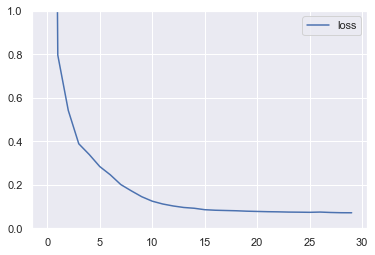

In [59]:
pd.DataFrame( history.history, columns=history.history.keys() ).plot()
plt.grid(True)
plt.gca().set_ylim(0,1) #
plt.show()

### Fazendo previsões para dados de treino

In [60]:
y_pred_train = model_RNA.predict(X_train).flatten()

511/511 [==============================] - 0s 729us/step


In [61]:
y_pred_train_truncado = np.where(y_pred_train > np.log(500001),np.log(500001),y_pred_train )

In [62]:
print("MSE = ",mean_squared_error(y_train, y_pred_train).round(3))

MSE =  0.068


In [63]:
print("MSE truncado = ",mean_squared_error(y_train, y_pred_train_truncado).round(3))

MSE truncado =  0.068


### MSE dos dados de teste e R2

In [64]:
mse_RNA = model_RNA.evaluate( X_test, y_test)


128/128 [==============================] - 0s 916us/step - loss: 0.0749


In [65]:
mse_RNA

0.0748867392539978

### Fazendo previsões com os dados de teste

In [66]:
y_pred = model_RNA.predict(X_test).flatten()

128/128 [==============================] - 0s 795us/step


In [67]:
sum(y_pred>np.log(500001))

2

In [68]:
y_pred_truncado = np.where(y_pred > np.log(500001),np.log(500001),y_pred )

In [69]:
print("MSE = ",mean_squared_error(y_test, y_pred).round(3))

MSE =  0.075


In [70]:
mse_RNA = mean_squared_error(y_test, y_pred_truncado).round(3)
print("MSE truncado = ",mse_RNA)

MSE truncado =  0.075


### Gráfico de dispersão entre as previsões e os valores reais

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Log Preço - Previsão', ylabel='Log Preço - Real'>

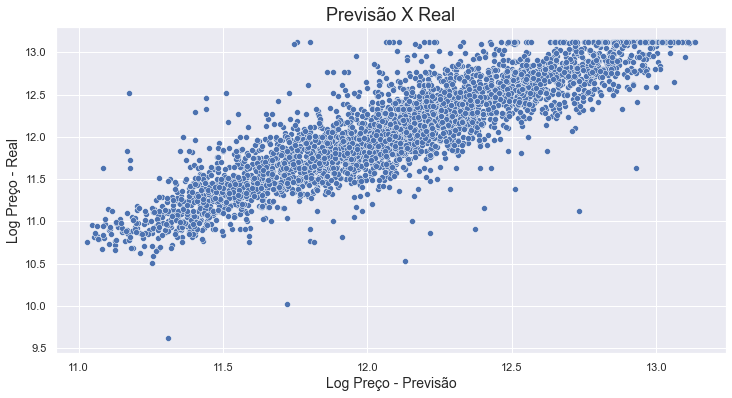

In [71]:
ax = sns.scatterplot(x=y_pred, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Log Preço - Previsão', fontsize=14)
ax.set_ylabel('Log Preço - Real', fontsize=14)
ax

<AxesSubplot:title={'center':'Previsão X Real'}, xlabel='Log Preço - Previsão', ylabel='Log Preço - Real'>

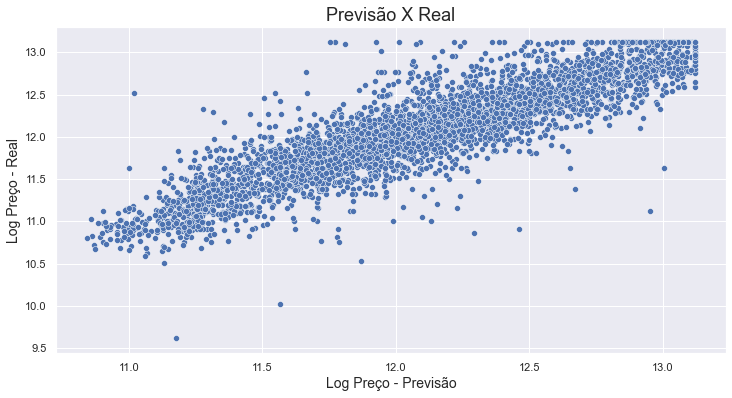

In [100]:
ax = sns.scatterplot(x=y_pred_truncado, y=y_test)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('Log Preço - Previsão', fontsize=14)
ax.set_ylabel('Log Preço - Real', fontsize=14)
ax

### Calculando o resíduo

In [72]:
residuo_RNA = y_test - y_pred_truncado

<AxesSubplot:title={'center':'Resíduos X Previsão'}, xlabel='Log Preço - Previsão', ylabel='Resíduos'>

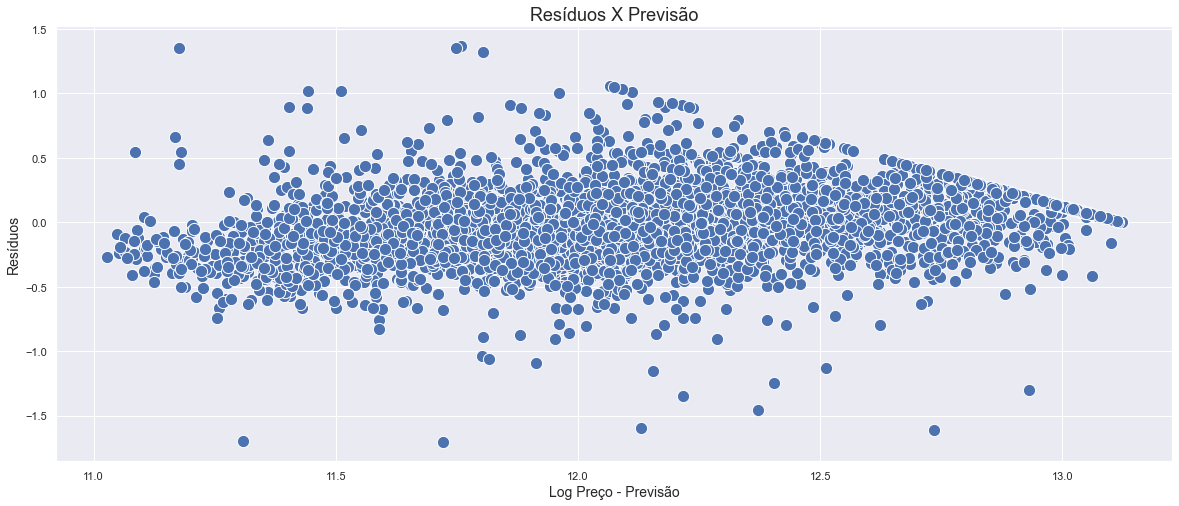

In [73]:
ax = sns.scatterplot(x=y_pred_truncado, y=residuo_RNA, s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resíduos X Previsão', fontsize=18)
ax.set_xlabel('Log Preço - Previsão', fontsize=14)
ax.set_ylabel('Resíduos', fontsize=14)
ax

### XGBoost

In [74]:
import xgboost as xgb

In [75]:
xg_model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1,eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2200)

In [76]:
xg_model.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False, eta=0.3,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2200,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [77]:
y_pred_xg = xg_model.predict(X_test)

mse_xg = mean_squared_error(y_test,y_pred_xg).round(3)


In [78]:
print("MSE_XGBoost = ",mse_xg)

MSE_XGBoost =  0.061


In [79]:
r2_xg =  metrics.r2_score(y_test,y_pred_xg).round(3)
print('R²_XGBoost', r2_xg)

R²_XGBoost 0.818


#### Realizando o truncamento

In [80]:
y_pred_xg_truncado = np.where(y_pred_xg > np.log(500001),np.log(500001),y_pred_xg )

mse_xg_truncado = mean_squared_error(y_test,y_pred_xg_truncado).round(3)


In [81]:
print("MSE_XGBoost_truncado = ",mse_xg_truncado)

MSE_XGBoost_truncado =  0.061


In [82]:
r2_xg_truncado =  metrics.r2_score(y_test,y_pred_xg_truncado).round(3)
print('R²_XGBoost_truncado', r2_xg_truncado)

R²_XGBoost_truncado 0.818


### Comparação Regressão x RNA x XGBoost

<AxesSubplot:xlabel='Valor real', ylabel='Regressão - Previsão'>

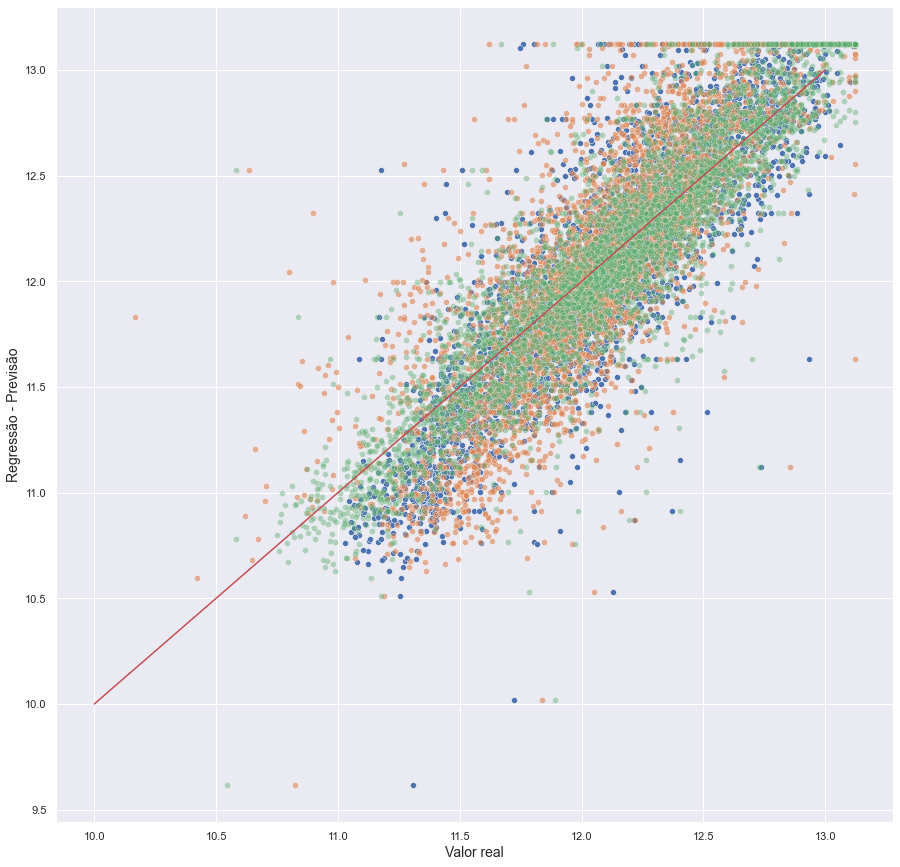

In [84]:
xlims=(10,13)
ylims=(10,13)

ax = sns.scatterplot(x=y_pred_truncado, y=y_test,alpha = 1)
ax = sns.scatterplot(x=y_previsto_truncado, y=y_test,alpha = 0.6)
ax = sns.scatterplot(x=y_pred_xg_truncado, y=y_test,alpha = 0.4)
#ax = sns.scatterplot(x=y_previsto_sw_truncado, y=y_test,alpha = 0.4)
ax.plot(xlims,xlims, color='r')
ax.figure.set_size_inches(15,15)
ax.set_xlabel('Valor real', fontsize=14)
ax.set_ylabel('Regressão - Previsão', fontsize=14)
ax


In [85]:
frame = { 'Real': y_test, 'Previsão - Regressão': y_previsto_truncado,'Previsão - RNA':y_pred_truncado,'Previsão - XGBoost':y_pred_xg_truncado}
previsoes = pd.DataFrame(frame)

In [114]:
previsoes

,Real,Previsão - Regressão,Previsão - RNA,Previsão - XGBoost
14416,12.412273,12.109210,12.028876,12.251627
16383,11.834284,11.864014,11.814031,11.853549
7731,12.293167,12.093161,12.228653,12.138045
1410,12.305013,11.943419,11.958335,11.708082
1335,12.046491,12.146691,11.960353,12.003379
...,...,...,...,...
8291,13.122365,12.388878,13.074887,12.496933
6274,11.969717,11.922527,12.024279,12.002761
2997,11.514923,11.766837,11.196422,11.362033
13440,11.757439,11.815495,11.568244,11.651513


### Testando variáveis embaralhamento

In [86]:
def MSE(model,x,y):
    if model == model_RNA:
        y_pred = model.predict(x,verbose = 0).flatten()
    else:
        y_pred = model.predict(x).flatten()
    
    y_pred_truncado = np.where(y_pred > np.log(500001),np.log(500001),y_pred)
    mse = mean_squared_error(y,y_pred).round(3)
    
    return mse
    

def embaralhar(x,col):
    data = np.copy(x)
    temp = np.array(data[:,col])
    np.random.shuffle(temp)
    data[:,col] = temp
    return data

def MSE_embaralhado(x,y,model,col):
   
    x_embaralhado = embaralhar(x,col)
    mse = MSE(model,x_embaralhado, y)
    
    return mse

def repeticoes(x, y, model, col, mse_real, size=1):

    vetor_repeticoes = np.empty(size)

    for i in range(size):
        vetor_repeticoes[i] = MSE_embaralhado(x,y,model,col)
        
    p =  pvalor(vetor_repeticoes, mse_real)  

    return vetor_repeticoes, p

def pvalor(valores_simulados,mse_real):
    
    p = np.sum(valores_simulados <= mse_real) / len(valores_simulados)
    #print(f'p-value = {p}')
    return p

In [116]:
#repeticoes( X_test, y_test,modelo, 0, size = 100).mean().round(3)
#repeticoes(X_test, y_test,model_RNA, 0, size = 100).mean().round(3)
#repeticoes( X_test,y_test,xg_model,0,size = 100).mean().round(3)
#model_RNA.predict(X_test,verbose = 0)

In [87]:
print(modelo_statsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     2919.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        23:31:48   Log-Likelihood:                -5545.6
No. Observations:               16346   AIC:                         1.111e+04
Df Residuals:                   16335   BIC:                         1.120e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -11.6972      0

In [118]:
modelo.coef_

array([-0.5517174 , -0.59570354,  0.04040374, -0.07054388,  0.2001311 ,
       -0.18652258,  0.08699117,  0.3375858 ])

### Comparando MSE - RNA X Regressão x XGBoost

In [88]:
linhas_MSE = [[ 
           repeticoes( X_test, y_test, modelo, i,mse_REG, size = 100)[0].mean().round(3),
           repeticoes( X_test, y_test, model_RNA, i,mse_RNA, size = 100)[0].mean().round(3),
           repeticoes( X_test, y_test, xg_model, i,mse_xg_truncado, size = 100)[0].mean().round(3)] for i in range(colunas.size)]

df_MSE = pd.DataFrame(linhas_MSE, columns=["Regressão", "Rede Neural", "XGBoost"])
df_MSE = df_MSE.set_index(colunas)
df_MSE = df_MSE.rename_axis('Variáveis')

In [89]:
linha_MSE = [[mse_REG, mse_RNA, mse_xg_truncado]]
df_MSE_geral = pd.DataFrame(linha_MSE, columns=["Regressão", "Rede Neural", "XGBoost"])
df_MSE_geral = df_MSE_geral.rename_axis('MSE')

In [90]:
df_MSE_geral

,Regressão,Rede Neural,XGBoost
MSE,,,
0,0.113,0.075,0.061


In [124]:
linhas_p = [[  
           repeticoes( X_test, y_test, modelo, i,mse_REG, size = 100)[1].mean().round(3),
           repeticoes( X_test, y_test, model_RNA, i,mse_RNA, size = 100)[1].mean().round(3),
           repeticoes( X_test, y_test, xg_model, i,mse_xg_truncado, size = 100)[1].mean().round(3)] for i in range(colunas.size)]

df_p = pd.DataFrame(linhas_p, columns=["Regressão", "Rede Neural", "XGBoost"])
df_p = df_p.set_index(colunas)
df_p = df_p.rename_axis('Variáveis')

In [125]:
df_p

,Regressão,Rede Neural,XGBoost
Variáveis,,,
longitude,0.0,0.0,0.0
latitude,0.0,0.0,0.0
housing_median_age,0.0,0.0,0.0
total_rooms,0.0,0.0,0.0
total_bedrooms,0.0,0.0,0.0
population,0.0,0.0,0.0
households,0.0,0.0,0.0
median_income,0.0,0.0,0.0


## SHAP

In [91]:
import shap

In [92]:
#initialize js methods for visualization
shap.initjs()

# create an instance of the DeepSHAP which is called DeepExplainer
explainer_shap = shap.DeepExplainer(model=model_RNA,
                                 data=X_train)

# Fit the explainer on a subset of the data (you can try all but then gets slower)
shap_values = explainer_shap.shap_values(X=X_train[:500],
                                      ranked_outputs=True)

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


In [ ]:
# to get the output value and base value
#record = 1 # this is just to pick one record in the dataset 
#base_value = explainer_2.expected_value
#output= base_value + np.sum(shap_values[0][0][record])
#print('base value: ',base_value)
#print('output value: ',output)

#sanity check that the ouput value is equal to the actual prediction
#print(np.round(output,decimals=1) == np.round(model.predict(X_train.values)[record],decimals=1))


# to get the shape values or each feature
#shap_df = pd.DataFrame(list(dict(zip(X_train_norm.values,base_value)).items()),
#             columns=['features','shapvals']).sort_values(by='shapvals', ascending=True)
#print(shap_df)

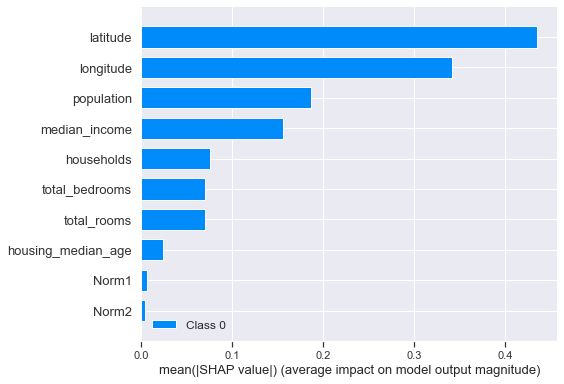

In [104]:
# get the ovearall mean contribution of each feature variable
shap.summary_plot(shap_values[0], X_train[:500], feature_names=x.columns)

In [125]:
vetor = [np.array(x) for x in shap_values[0][0]]
shap = [np.mean(np.absolute(k)) for k in zip(*vetor)]


[0.34220515238744476,
 0.4357838006759382,
 0.023690567542103153,
 0.07014027883861522,
 0.07043148961404541,
 0.18680446389990824,
 0.07579389701356458,
 0.1557231783013995,
 0.006057094113034798,
 0.004094552586019668]

In [130]:
df_MSE['SHAP Values'] = shap
df_MSE['Coef Regressão'] = modelo.coef_
df_MSE

,Regressão,Rede Neural,XGBoost,SHAP Values,Coef Regressão
Variáveis,,,,,
longitude,0.721,0.245,0.321,0.342205,-0.551665
latitude,0.834,0.289,0.391,0.435784,-0.595609
housing_median_age,0.120,0.089,0.066,0.023691,0.040421
total_rooms,0.125,0.137,0.076,0.070140,-0.070775
total_bedrooms,0.203,0.138,0.078,0.070431,0.200020
population,0.185,0.169,0.098,0.186804,-0.186592
households,0.135,0.140,0.064,0.075794,0.087383
median_income,0.351,0.232,0.205,0.155723,0.337645
Norm1,0.117,0.075,0.061,0.006057,-0.001718


### previsão nos gráficos

In [1]:
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
                s=df['population']/100, label='population', figsize=(15,10),
                c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True)


plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
plt.grid(b=None)
plt.legend() 
plt.show()

NameError: name 'df' is not defined